<a href="https://colab.research.google.com/github/ClementeGarcia/Simulaci-n-1/blob/main/TiempoEspera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tiempo de espera

Dos personas han quedado citadas en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0,30] minutos. Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 minutos.





# 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evolución global del sistema real.


\begin{align*}
    t_1 &\sim U(0, 30) \\
    t_2 &\sim U(0, 30)
\end{align*}



*   $t_1$: Tiempo de llegada de la persona 1
*   $t_2$: Tiempo de llegada de la persona 2


# 2. Determina la distribución de probabilidad

Elige el tipo de distribución que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identicadas en el paso anterior.

## Distribución Uniforme Continua $U \sim (0,1)$

### Definición:
La distribución uniforme continua en el intervalo $[a, b]$ es una distribución en la que todos los valores dentro del intervalo tienen la misma probabilidad.
### Función de Densidad de Probabilidad

$$
f(x) =
\begin{cases}
\frac{1}{b - a}, & \text{si } a \leq x \leq b \\
0, & \text{en otro caso}
\end{cases}
$$

# 3. Modele las variables aleatorias
Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

Para simular el sistema, se deben generar números aleatorios que sigan fielmente la distribución Uniforme.



In [18]:
import numpy as np

# Se genera el número alaetorio
tiempo_llegada_1 = np.random.uniform(low=0, high=30)
tiempo_llegada_2 = np.random.uniform(low=0, high=30)

print(f"Ejemplo de t1: {tiempo_llegada_1:.4f}")
print(f"Ejemplo de t2: {tiempo_llegada_2:.4f}")

Ejemplo de t1: 20.3090
Ejemplo de t2: 14.3359


# 4.Defina el modelo del sistema y los objetivos de la simulación
Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real validando el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

EL modelo del sistema se define por la interacci+on de las variables aleatorias. La condición a evaluar es si el tiempo de espera es menor o igual a 10 minutos.

$$
P(|t_1 - t_2| \leq 10 )
$$

# 5.Diseñe el experimento
Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.



In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import matplotlib.pyplot as plt
#Realiza UNA simulación de Monte Carlo
def simu(N_muestras):
    tiempo_max = 30
    espera_max = 10
    # 1. Generar N_muestras para t1 y t2
    t1 = np.random.uniform(0, tiempo_max, N_muestras)
    t2 = np.random.uniform(0, tiempo_max, N_muestras)

    #Calcular la diferencia de tiempo
    tiempo_espera = np.abs(t1 - t2)
    #Contar cuántas muestras cumplen la condición de exitos
    exitos = np.sum(tiempo_espera <= espera_max)

    # Calcular y devolver la probabilidad para esta simulación
    probabilidad = exitos / N_muestras
    return probabilidad


#6. Repita el experimento n veces
Así dispondrá de observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

In [23]:
# Número de veces que repetiremos el experimento completo.
n_rep = 1000

# Número de muestras a generar dentro de CADA experimento.
N = 10000
# Almacenaremos la probabilidad estimada de cada una de las 'n' repeticiones
lista_de_resultados = []

print(f"Repitiendo el experimento {n_rep} veces, con {N} muestras cada vez...")

for i in range(n_rep):
    # Llama a la función para obtener una estimación de la probabilidad
    prob_estimada = simu(n_rep)
    lista_de_resultados.append(prob_estimada)

# Calculamos el promedio acumulado
promedios_acumulados = np.cumsum(lista_de_resultados) / np.arange(1, n_rep + 1)

probabilidad_final = promedios_acumulados[-1]

print(f"\nLa estimación final de la probabilidad (promedio de {n_rep} experimentos) es: {probabilidad_final:.6f}")

Repitiendo el experimento 1000 veces, con 10000 muestras cada vez...

La estimación final de la probabilidad (promedio de 1000 experimentos) es: 0.555818


#7. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado



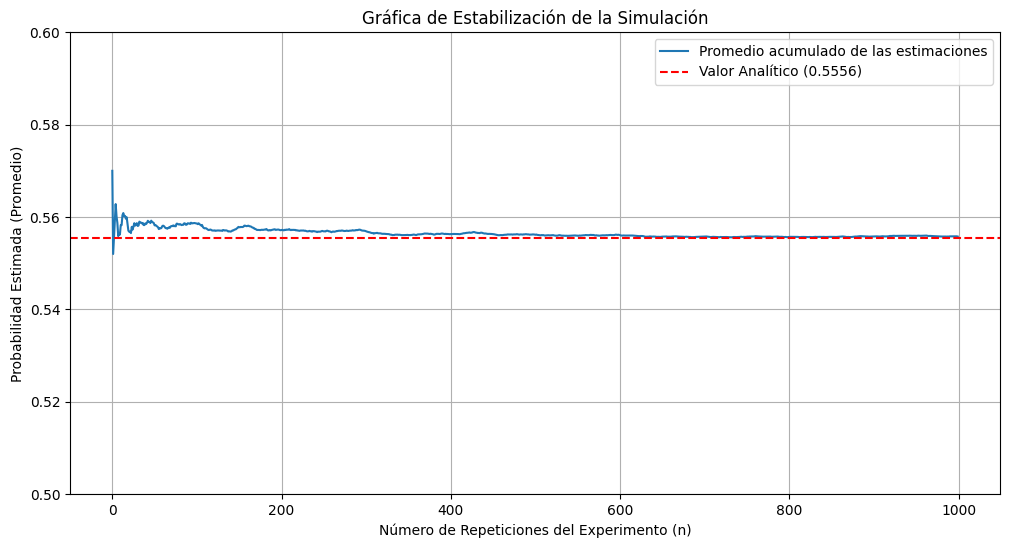

In [22]:
# Valor analítico para comparar
valor_analitico = 5/9

plt.figure(figsize=(12, 6))

# Graficamos la lista de promedios acumulados
plt.plot(promedios_acumulados, label='Promedio acumulado de las estimaciones')

plt.xlabel(f'Número de Repeticiones del Experimento (n)')
plt.ylabel('Probabilidad Estimada (Promedio)')
plt.title('Gráfica de Estabilización de la Simulación')
plt.grid(True)
plt.axhline(y=valor_analitico, color='r', linestyle='--', label=f'Valor Analítico ({valor_analitico:.4f})')
plt.legend()
plt.ylim(0.5, 0.6)

plt.show()